# Predict a bank loan default

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank (1).csv


In [ ]:
#importing relevant libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc('font' , size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


from sklearn import metrics
import seaborn as sns
sns.set(style= 'white')
sns.set(style= 'whitegrid', color_codes=True)

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
#Importing our dataset from csv file
data=pd.read_csv( 'bank.csv')
data.head()

,loan_applicant_id,age,education,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y
0,191,44,university.degree,10,20,192,12.116645,14.377313,8.886645,1
1,34318,34,high.school,3,18,57,14.264229,5.137880,2.992730,0
2,14932,45,university.degree,14,24,212,7.285681,10.460306,4.985339,0
3,2776,33,illiterate,12,5,418,11.386272,3.040189,44.554429,1
4,11915,20,basic,4,19,122,28.418494,14.560450,20.110112,0


In [ ]:
print(data.shape)

(41188, 10)


The dataset provides loan applicants’ information. It includes 41,188 records and 10 fields.

In [ ]:
print(list(data.columns))

['loan_applicant_id', 'age', 'education', 'years_with_current_employer', 'years_at_current_address', 'household_income', 'debt_to_income_ratio', 'credit_card_debt', 'other_debt', 'y']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_applicant_id            41188 non-null  int64  
 1   age                          41188 non-null  int64  
 2   education                    41188 non-null  object 
 3   years_with_current_employer  41188 non-null  int64  
 4   years_at_current_address     41188 non-null  int64  
 5   household_income             41188 non-null  int64  
 6   debt_to_income_ratio         41188 non-null  float64
 7   credit_card_debt             41188 non-null  float64
 8   other_debt                   41188 non-null  float64
 9   y                            41188 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 3.1+ MB


Input variables
1.	loan_applicant_id (numeric)
2.	age (numeric)
3.	education : level of education (categorical)
4.	years_with_current_employer (numeric)
5.	years_at_current_address (numeric)
6.	household_income: in thousands of USD (numeric)
7.	debt_to_income_ratio: in percent (numeric)
8.	credit_card_debt: in thousands of USD (numeric)
9.	other_debt: in thousands of USD (numeric)

Predict variable (desired target):
y — has the loan applicant defaulted on his loan? (binary: “1”, means “Yes”, “0” means “No”)


In [ ]:
dp = data['education'].unique()
print(dp)

['university.degree' 'high.school' 'illiterate' 'basic'
 'professional.course']


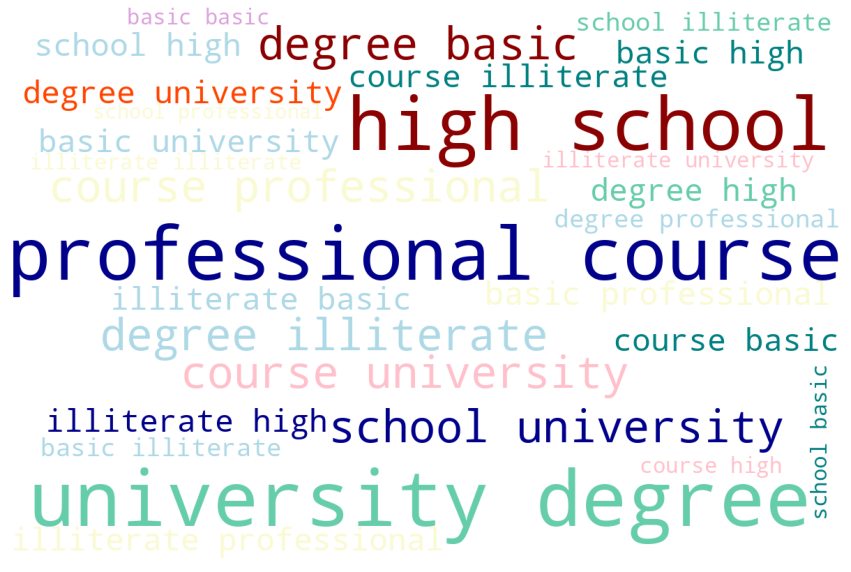

In [ ]:
from wordcloud import WordCloud
from matplotlib import colors 

color_list=  ['DarkBlue','Teal','LightBlue','MediumAquamarine','Plum','OrangeRed','DarkRed','Pink','LightGoldenrodYellow']

colormap = colors.ListedColormap(color_list)

plt.rcParams['figure.figsize'] = (15,15)

wordcloud =  WordCloud(background_color= 'white',
                       width = 1200,height = 800 ,
                       max_words = 120,colormap = colormap ).generate(" ".join(data['education']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
#Let us check if there are any missing values in the data.
data.isnull().sum()

loan_applicant_id              0
age                            0
education                      0
years_with_current_employer    0
years_at_current_address       0
household_income               0
debt_to_income_ratio           0
credit_card_debt               0
other_debt                     0
y                              0
dtype: int64

No missing values!!!!

# Data exploration

In [ ]:
# standard statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_applicant_id,41188.0,20594.500000,11890.095780,1.000000,10297.750000,20594.500000,30891.250000,41188.000000
age,41188.0,38.007842,10.623627,20.000000,29.000000,38.000000,47.000000,56.000000
years_with_current_employer,41188.0,13.549869,8.145105,0.000000,6.000000,14.000000,21.000000,29.000000
years_at_current_address,41188.0,15.385331,9.184471,0.000000,7.000000,15.000000,23.000000,31.000000
household_income,41188.0,139.707366,81.688037,14.000000,74.000000,134.000000,196.000000,446.000000
debt_to_income_ratio,41188.0,16.224054,9.191426,0.400386,8.452497,16.105334,23.730786,41.293984
credit_card_debt,41188.0,9.577260,12.408628,0.005668,1.853292,5.311447,12.636789,149.015859
other_debt,41188.0,13.758168,14.596510,0.021759,3.783906,9.153871,18.906855,159.198221
y,41188.0,0.112654,0.316173,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

Text(0, 0.5, 'Number of\nloan applicant')

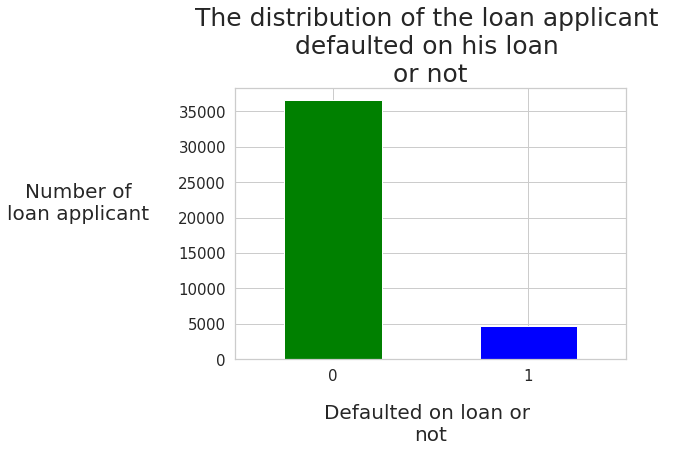

In [ ]:
data.y.value_counts().sort_index(ascending=True).plot.bar(color=['green','blue'],figsize=(7,5)).grid(True)
plt.title('The distribution of the loan applicant \ndefaulted on his loan \nor not', fontsize=25)

plt.xticks(None,fontsize=15,rotation=0)
plt.xlabel('Defaulted on loan or \nnot',fontsize=20,labelpad = 20)

plt.yticks(fontsize=15)
plt.ylabel('Number of\nloan applicant',fontsize=20,rotation=0,labelpad = 100)

In [ ]:
count_no_default = len(data[data['y']==0])
count_default = len(data[data['y']==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print("\033[1m percentage of no default is", pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print("\033[1m percentage of default", pct_of_default*100)

 percentage of no default is 88.73458288821988
 percentage of default 11.265417111780131


### Only a small part 11% of the target variable consists of people who default on loans. However i can say that the dataset is **unbalaced**.

In [ ]:
#Use the groupby function combined with the mean() to view the relation between the  loan default and all the other features to more understand the dataset.
data.groupby('y').mean()

,loan_applicant_id,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt
y,,,,,,,,
0,22914.5,37.975676,13.447521,15.497729,128.300646,15.514879,7.810996,12.127154
1,2320.5,38.261207,14.356034,14.500000,229.554957,21.810028,23.489629,26.605214


* The average age of loan applicants who defaulted on their loans is higher than that of the loan applicants who didn’t.
* Surprisingly, years_with_current_employer (years with current employer) are higher for the loan applicants who defaulted on their loans.
* Understandably, years_at_current_address (years at current address) are lower the loan applicants who defaulted on their loans. The lower the years at current address, the higher the chance to default on a loan.
* Surprisingly, household_income (household income) is higher for the loan applicants who defaulted on their loans.
* Understandably, debt_to_income_ratio (debt to income ratio) is higher for the loan applicants who defaulted on their loans.
* Understandably, credit_card_debt (credit card debt) is higher for the loan applicants who defaulted on their loans.
* Naturaly , other_debt (other debt) is higher for the loan applicants who defaulted on their loans.

We can calculate categorical mean for our categorical variable “education” to get a more detailed sense of our data.

In [ ]:
data.groupby('education').mean()

,loan_applicant_id,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y
education,,,,,,,,,
basic,20715.466902,37.926138,13.452422,15.372353,139.645291,16.259856,9.623007,13.578631,0.112558
high.school,20496.678068,38.027093,13.585877,15.314944,139.625598,16.192938,9.512649,13.766241,0.112296
illiterate,20381.154156,38.010513,13.483130,15.424694,139.980562,16.270517,9.645607,13.962909,0.116137
professional.course,20543.622328,38.135690,13.641278,15.310860,138.129981,16.138116,9.343046,13.543704,0.109208
university.degree,20828.736579,37.941197,13.585645,15.501012,141.127128,16.258214,9.758195,13.936749,0.113082


# Data Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


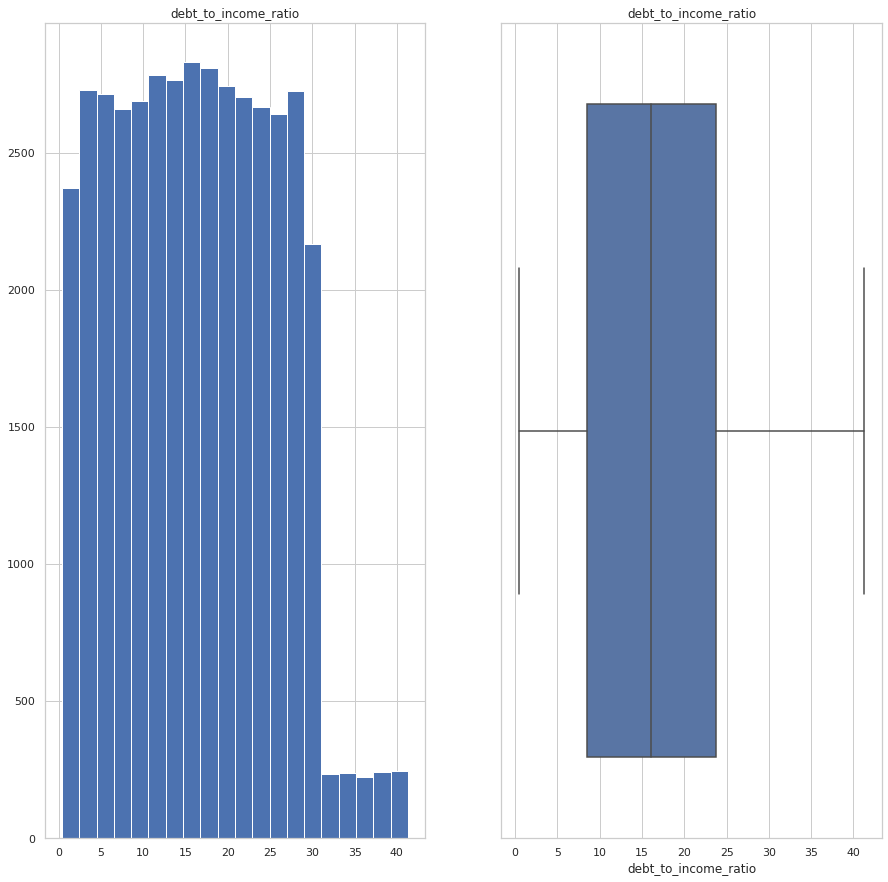

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


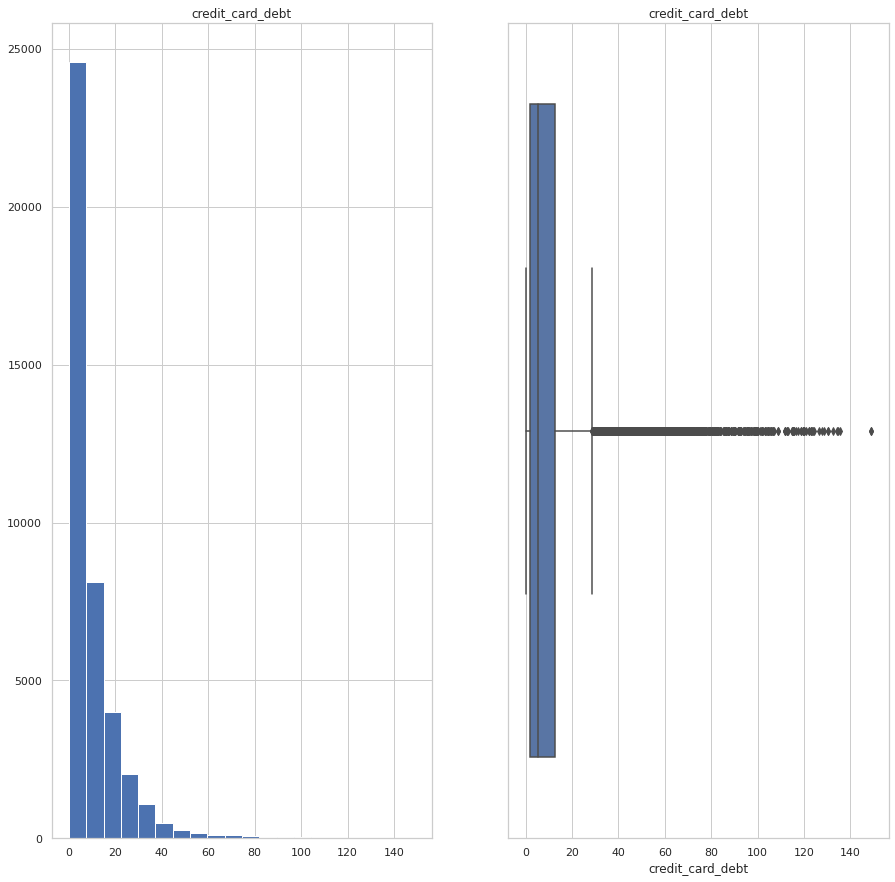

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


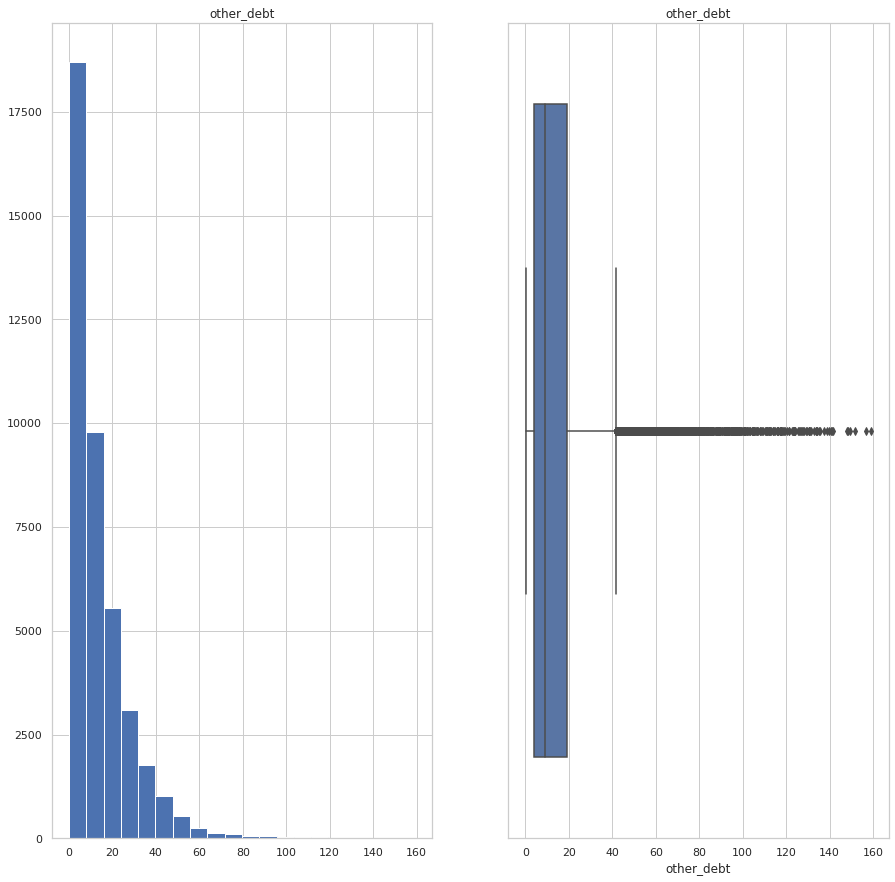

In [ ]:
# Data Visualization
for col in data.columns:
    if data[col].dtypes=="float64":
        plt.subplot(1,2,1)
        plt.hist(data[col], bins=20)
        plt.title(col)
        plt.subplot(1,2,2)
        sns.boxplot(data[col], orient="h")
        plt.title(col)
        plt.show()

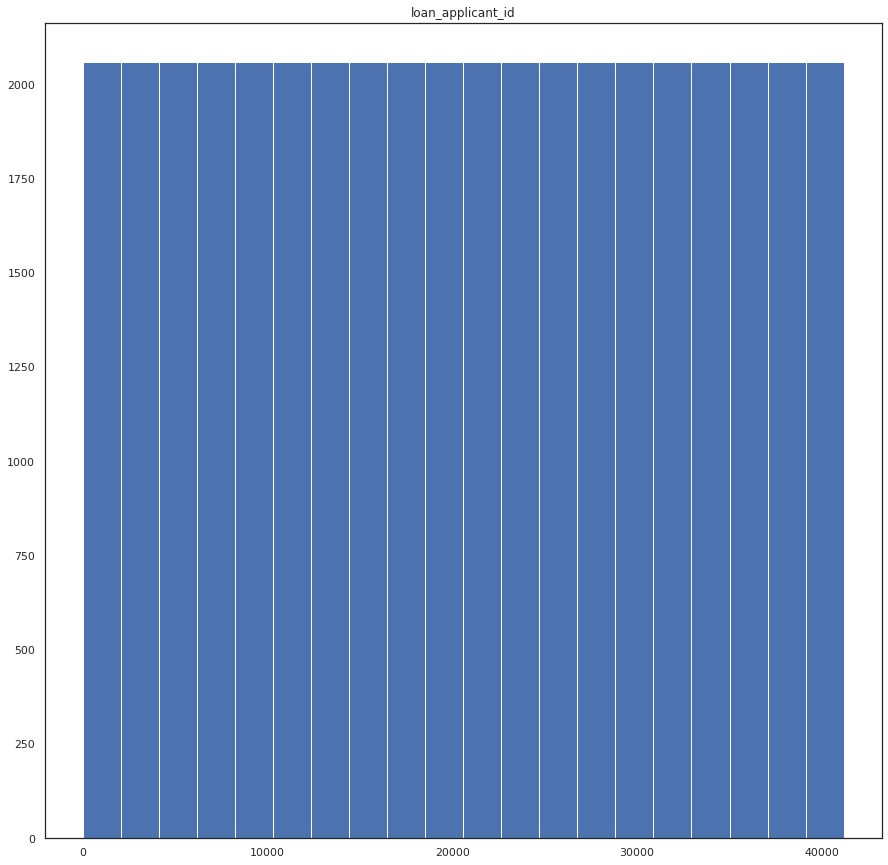

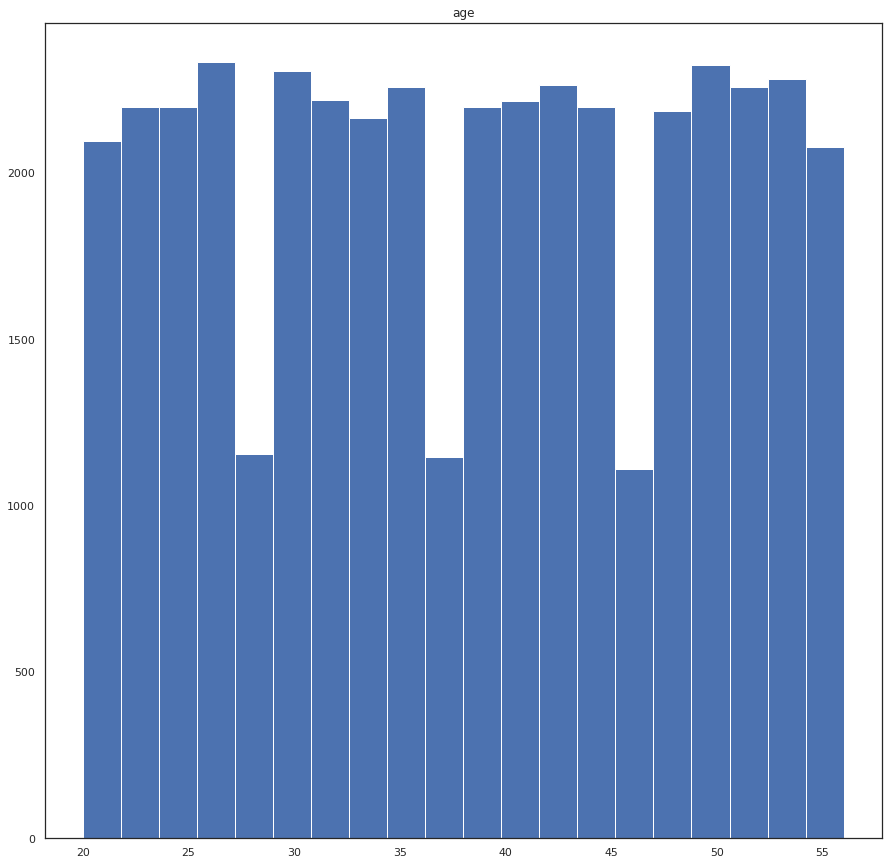

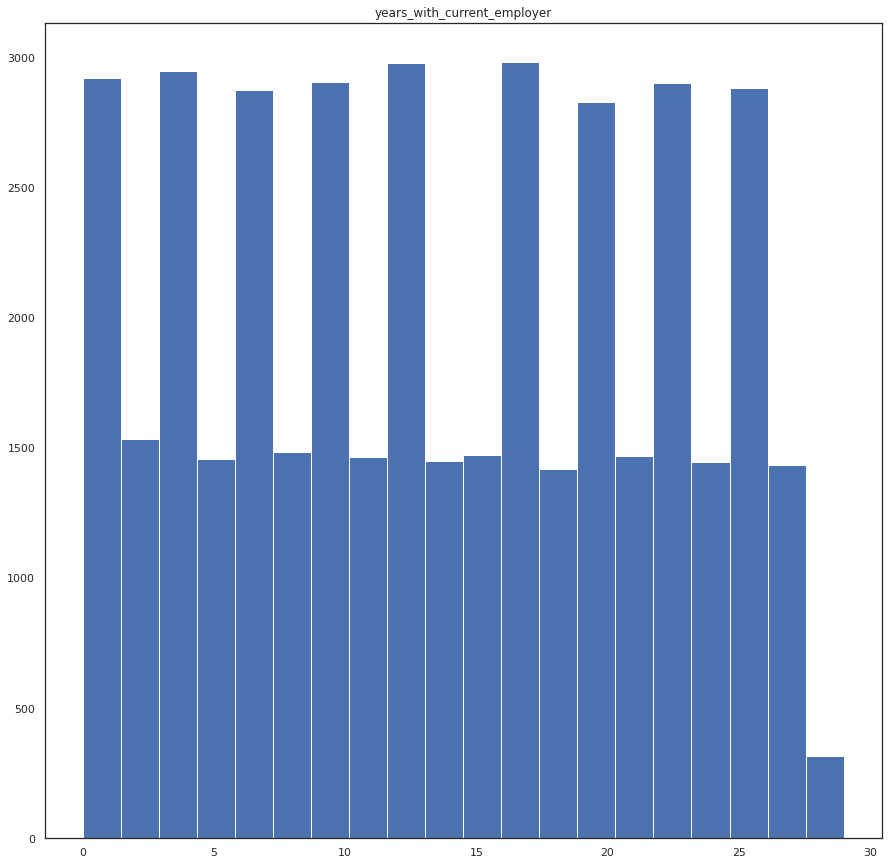

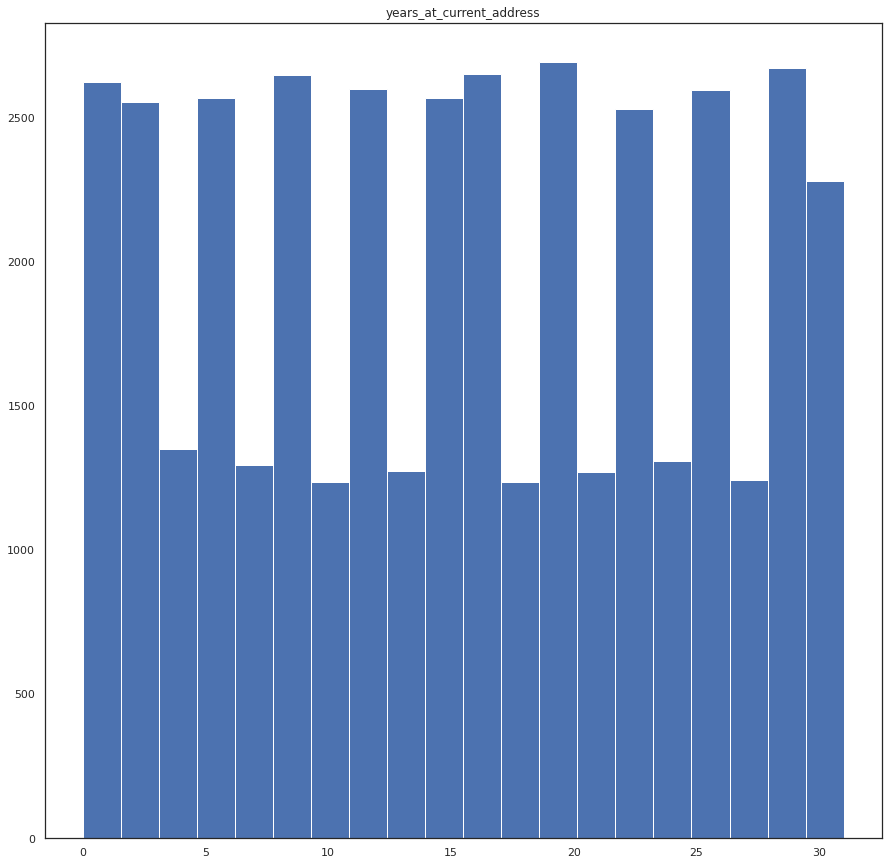

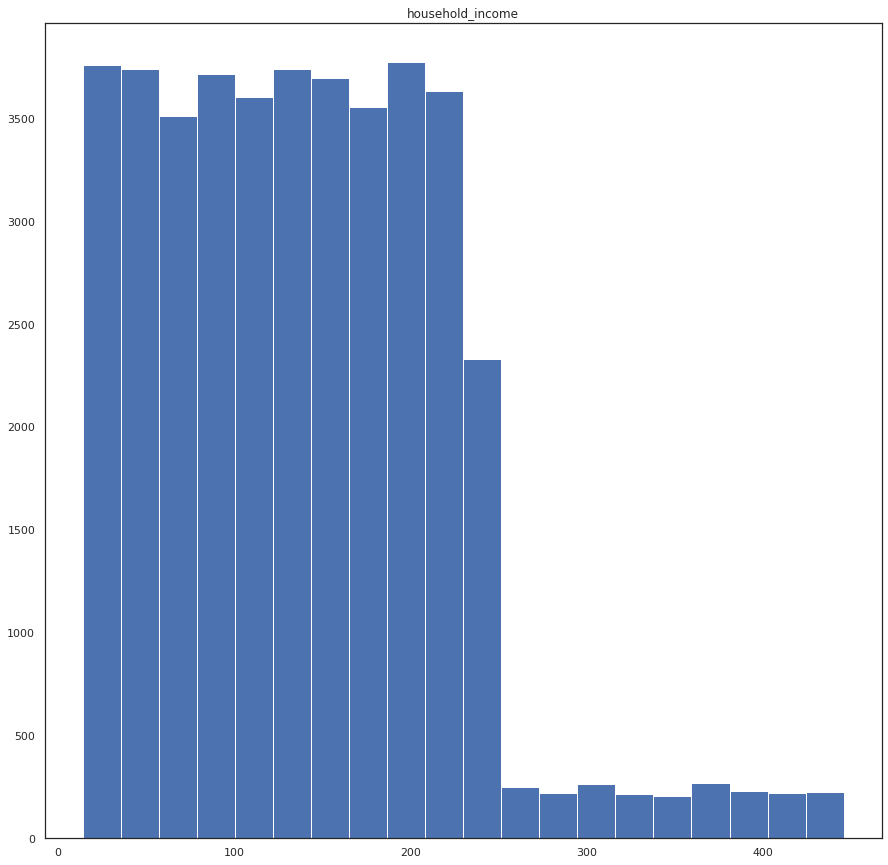

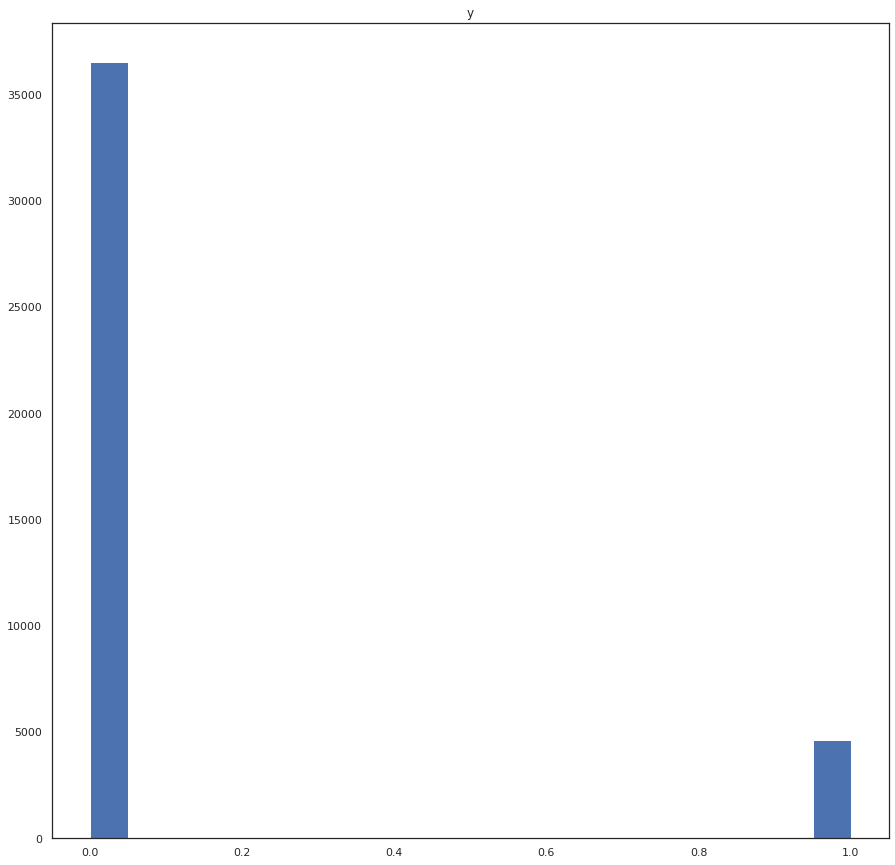

In [ ]:
for col in data.columns:
    if data[col].dtypes=="int64":
        plt.hist(data[col], bins=20)
        plt.title(col)
        plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

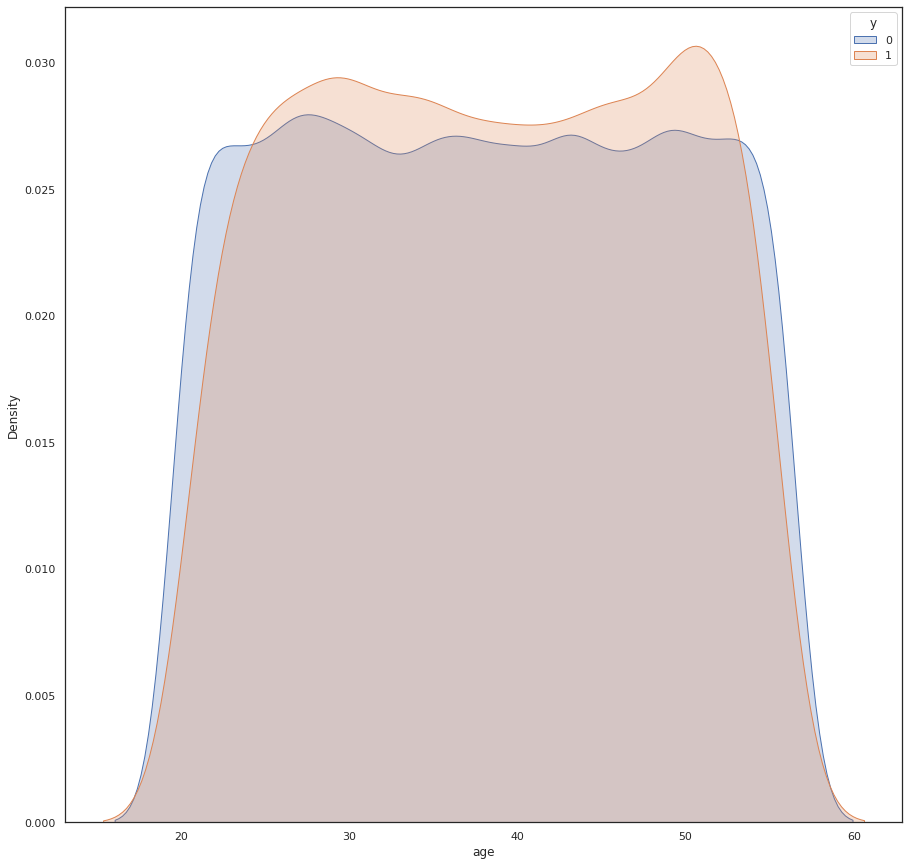

In [ ]:
import seaborn as sns
sns.set(style="white")
sns.kdeplot( data['age'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['age'].loc[data['y'] == 1], hue=data['y'], shade=True)

In [ ]:
data['age'].loc[data['y'] == 0].describe()

count    36548.000000
mean        37.975676
std         10.686491
min         20.000000
25%         29.000000
50%         38.000000
75%         47.000000
max         56.000000
Name: age, dtype: float64

In [ ]:
data['age'].loc[data['y'] == 1].describe()

count    4640.000000
mean       38.261207
std        10.112340
min        21.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        55.000000
Name: age, dtype: float64

The age does not seem a strong predictor for the target variable.

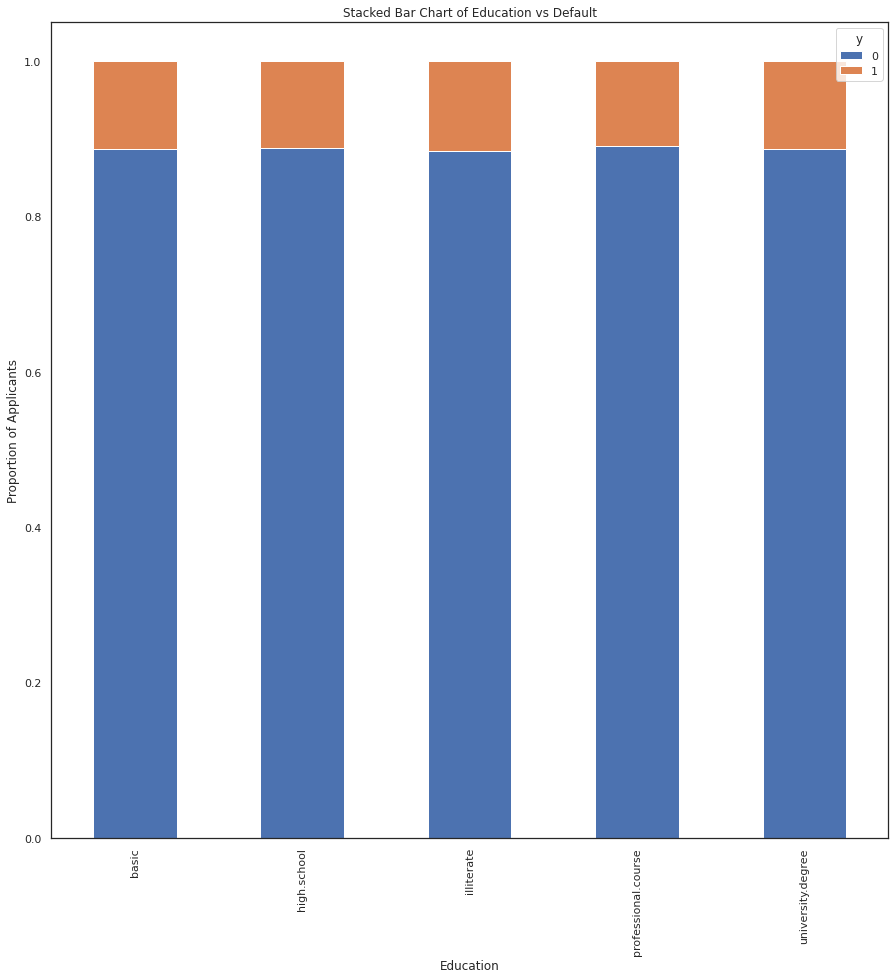

In [ ]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Stacked Bar Chart of Education vs Default")
plt.xlabel("Education")
plt.ylabel("Proportion of Applicants")
plt.savefig("education_vs_def_stack")

The education as a categorical variable does not seem a strong predictor for the target variable. I must convert it to numerical variable.

<AxesSubplot:xlabel='years_with_current_employer', ylabel='Density'>

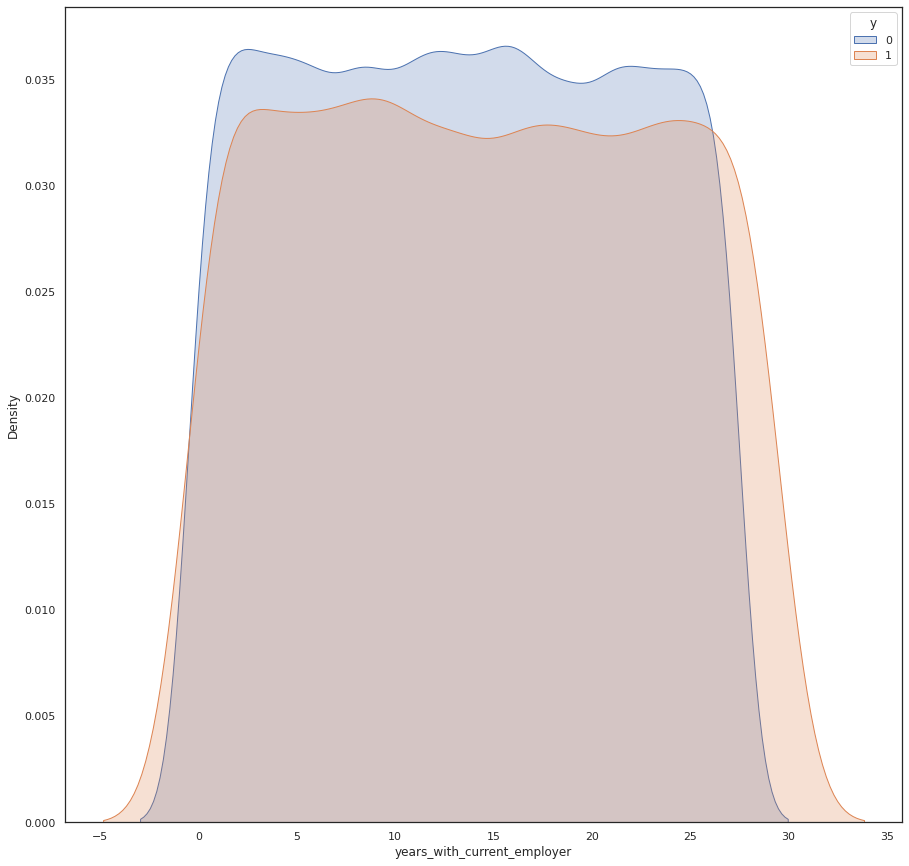

In [ ]:
sns.kdeplot( data['years_with_current_employer'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['years_with_current_employer'].loc[data['y'] == 1], hue=data['y'], shade=True)

<AxesSubplot:xlabel='years_at_current_address', ylabel='Density'>

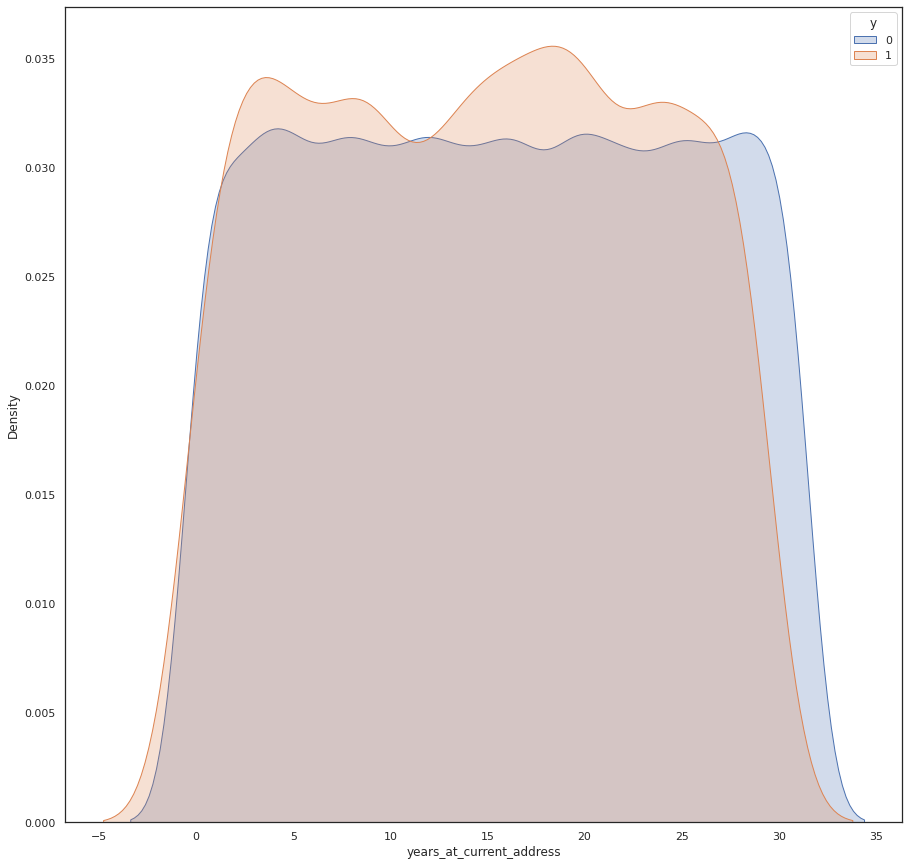

In [ ]:
sns.kdeplot( data['years_at_current_address'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['years_at_current_address'].loc[data['y'] == 1], hue=data['y'], shade=True)

<AxesSubplot:xlabel='household_income', ylabel='Density'>

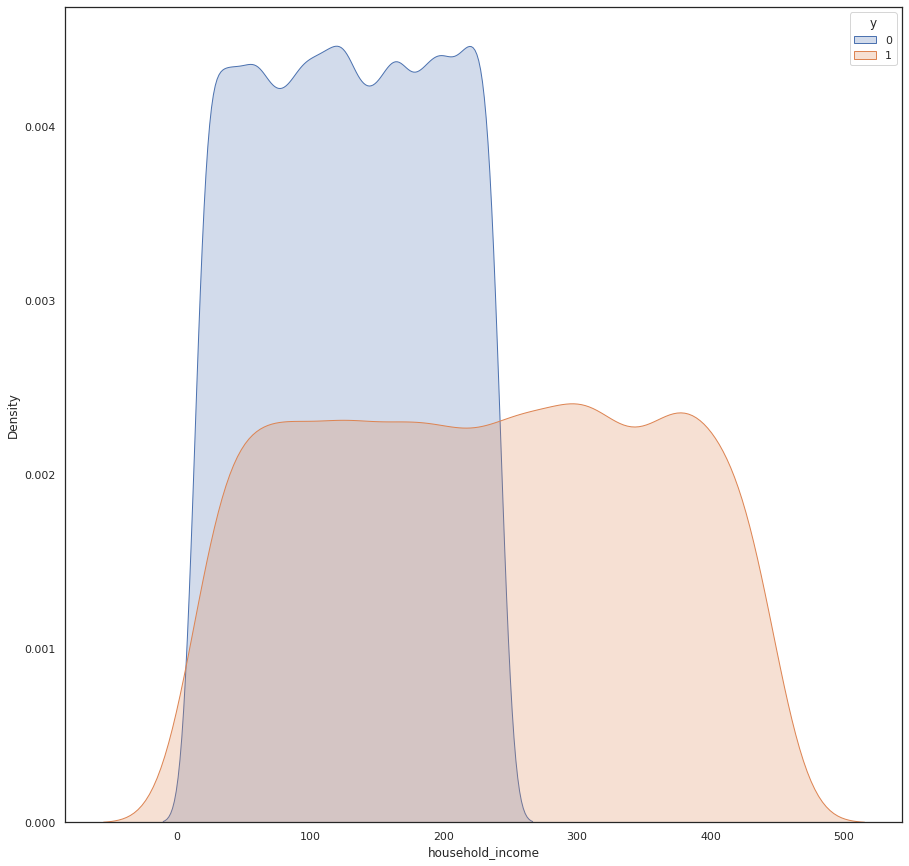

In [ ]:
sns.kdeplot( data['household_income'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['household_income'].loc[data['y'] == 1], hue=data['y'], shade=True)

<AxesSubplot:xlabel='debt_to_income_ratio', ylabel='Density'>

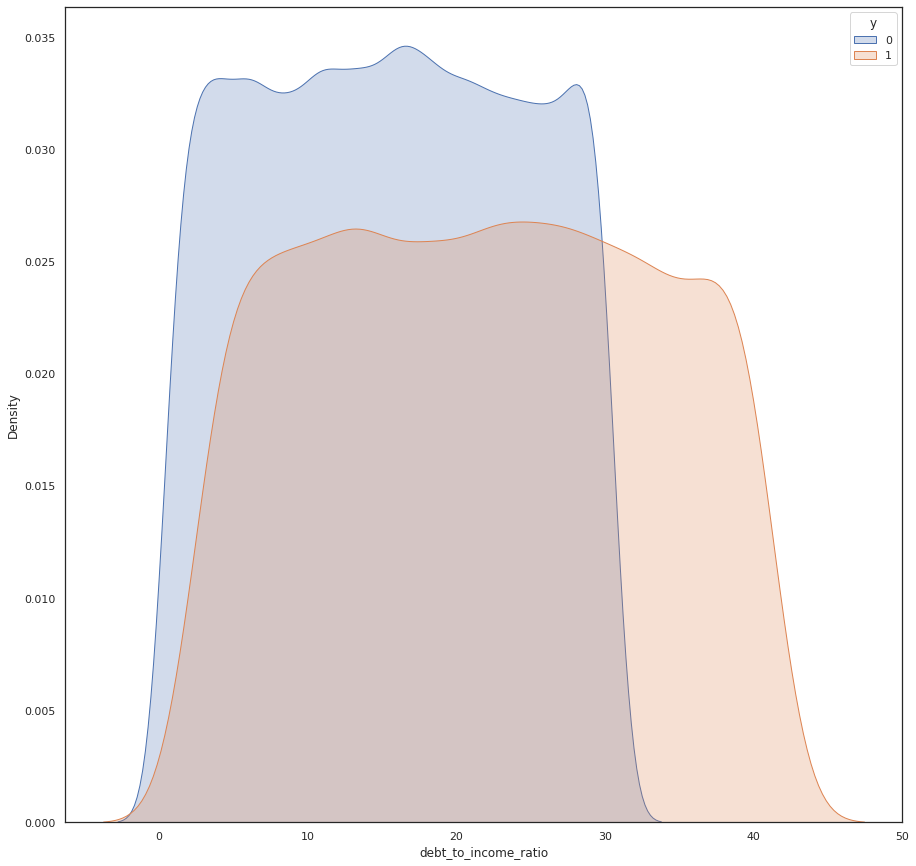

In [ ]:
sns.kdeplot( data['debt_to_income_ratio'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['debt_to_income_ratio'].loc[data['y'] == 1], hue=data['y'], shade=True)

<AxesSubplot:xlabel='credit_card_debt', ylabel='Density'>

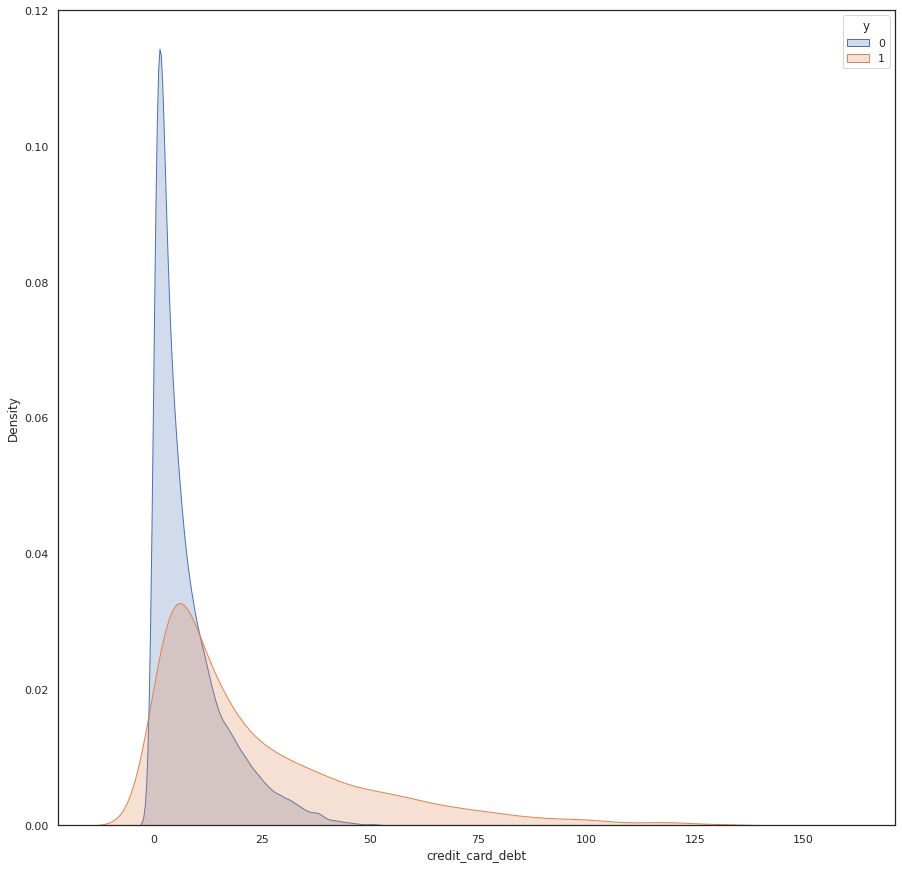

In [ ]:
sns.kdeplot( data['credit_card_debt'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['credit_card_debt'].loc[data['y'] == 1], hue=data['y'], shade=True)

<AxesSubplot:xlabel='other_debt', ylabel='Density'>

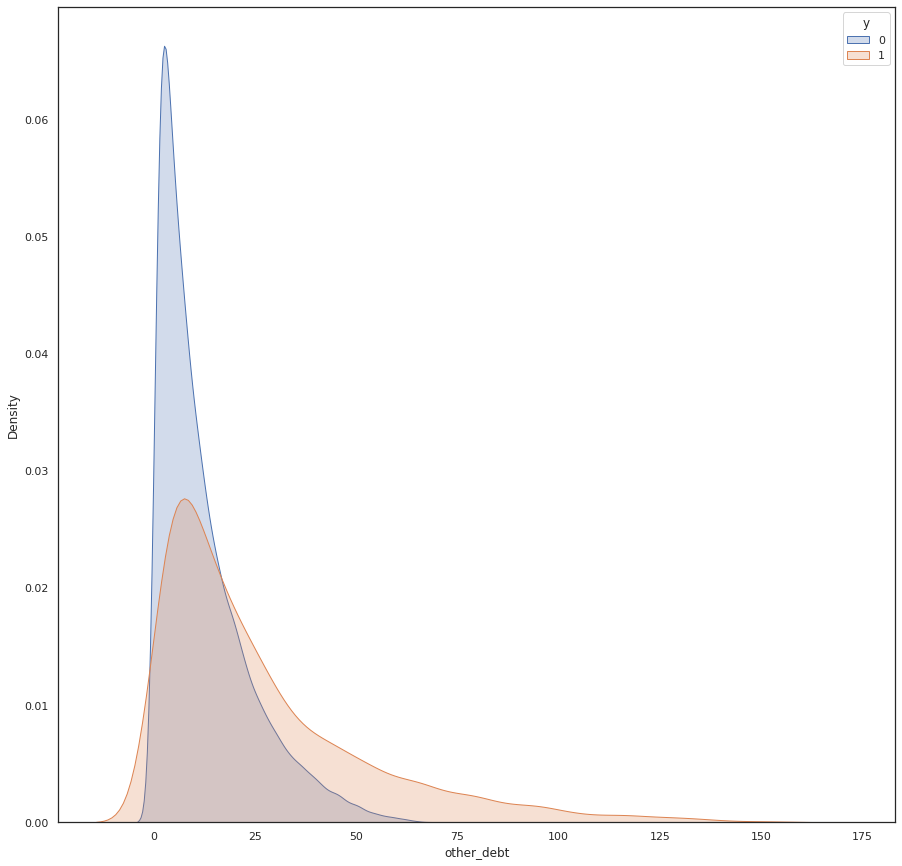

In [ ]:
sns.kdeplot( data['other_debt'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['other_debt'].loc[data['y'] == 1], hue=data['y'], shade=True)

Create dummy variables: education variable is categorical so i use one hot encoding function to convert education into many numerical features. 

In [ ]:

cat_vars=['education']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['education']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

ValueError: ignored

In [ ]:
data_final=data[to_keep]

#drop loan applicant id column because it is unnecesary
data_final.drop(['loan_applicant_id'], axis=1, inplace=True)
data_final.columns.values

array(['age', 'years_with_current_employer', 'years_at_current_address',
       'household_income', 'debt_to_income_ratio', 'credit_card_debt',
       'other_debt', 'y', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree'], dtype=object)

In [ ]:
data_final.head()

,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,44,10,20,192,12.116645,14.377313,8.886645,1,0,0,0,0,1
1,34,3,18,57,14.264229,5.137880,2.992730,0,0,1,0,0,0
2,45,14,24,212,7.285681,10.460306,4.985339,0,0,0,0,0,1
3,33,12,5,418,11.386272,3.040189,44.554429,1,0,0,1,0,0
4,20,4,19,122,28.418494,14.560450,20.110112,0,1,0,0,0,0


In [ ]:

corrMatrix = data_final.corr()

In [ ]:
corrMatrix

,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree
age,1.000000,0.003541,-0.000792,0.012941,0.002368,0.006742,0.008382,0.008498,-0.003840,0.000901,0.000125,0.006015,-0.003176
years_with_current_employer,0.003541,1.000000,0.003735,0.017895,0.015861,0.021350,0.019016,0.035266,-0.005973,0.002197,-0.004079,0.005609,0.002223
years_at_current_address,-0.000792,0.003735,1.000000,-0.015017,-0.016278,-0.016825,-0.015577,-0.034347,-0.000705,-0.003808,0.002134,-0.004052,0.006376
household_income,0.012941,0.017895,-0.015017,1.000000,0.089134,0.570904,0.602902,0.391905,-0.000379,-0.000497,0.001665,-0.009651,0.008798
debt_to_income_ratio,0.002368,0.015861,-0.016278,0.089134,1.000000,0.512834,0.587590,0.216545,0.001945,-0.001682,0.002517,-0.004673,0.001881
credit_card_debt,0.006742,0.021350,-0.016825,0.570904,0.512834,1.000000,0.381699,0.399494,0.001841,-0.002588,0.002742,-0.009434,0.007381
other_debt,0.008382,0.019016,-0.015577,0.602902,0.587590,0.381699,1.000000,0.313608,-0.006141,0.000275,0.006983,-0.007343,0.006193
y,0.008498,0.035266,-0.034347,0.391905,0.216545,0.399494,0.313608,1.000000,-0.000152,-0.000563,0.005484,-0.005448,0.000685
education_basic,-0.003840,-0.005973,-0.000705,-0.000379,0.001945,0.001841,-0.006141,-0.000152,1.000000,-0.248101,-0.248537,-0.249522,-0.252719
education_high.school,0.000901,0.002197,-0.003808,-0.000497,-0.001682,-0.002588,0.000275,-0.000563,-0.248101,1.000000,-0.247384,-0.248365,-0.251547


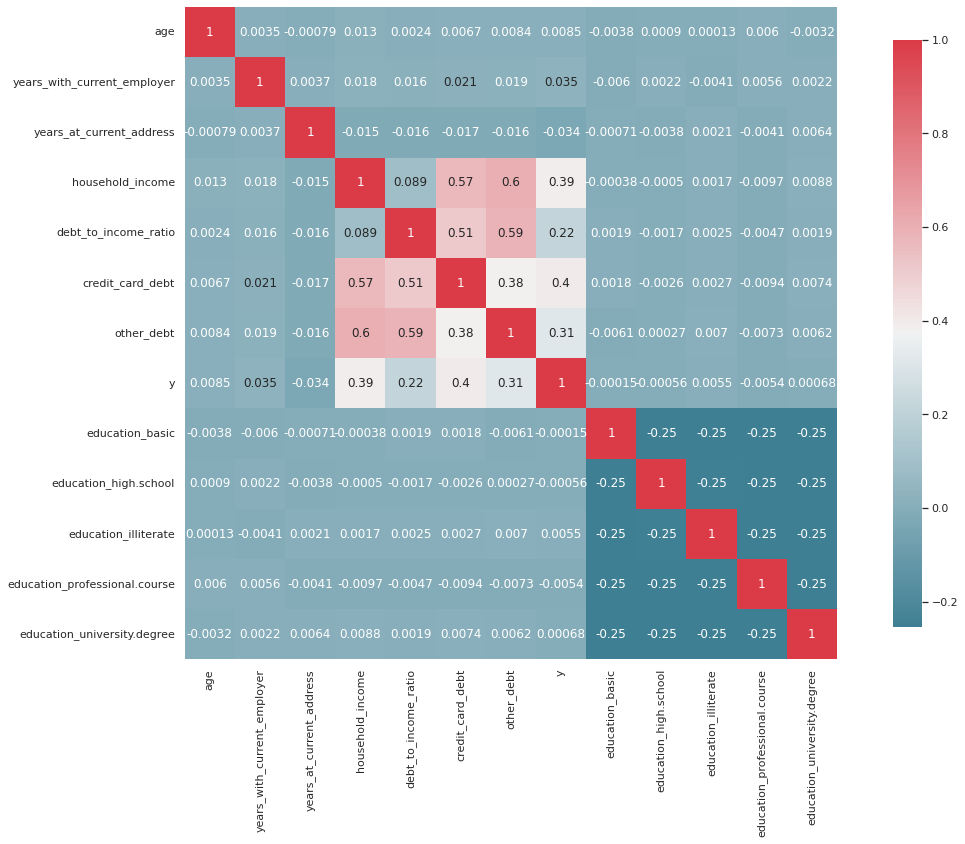

In [ ]:

def plot_correlation_map( data_final ):

    corr = data_final.corr()

    s , ax = plt.subplots( figsize =( 20 , 12 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(data_final)

y/credit_card_debt/household_income/debt_to_income_ratio/other_debt are correlated (important features).

### Make a balanced DataSet:

Over-sampling using SMOTE

With our training data created, I’ll up-sample the default using the SMOTE algorithm (Synthetic Minority Oversampling Technique). At a high level, SMOTE:

* Works by creating synthetic samples from the minor class (default) instead of creating copies.
* Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.
We are going to implement SMOTE in Python.

In [ ]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=42)

In [ ]:
# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
columns = X_train.columns
os_data_X,os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("\033[1m length of oversampled data is" ,len(os_data_X))
print("\033[1m Number of no default in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("\033[1m Number of default",len(os_data_y[os_data_y['y']==1]))
print("\033[1m Proportion of no default data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("\033[1m Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

 length of oversampled data is 48912
 Number of no default in oversampled data 24456
 Number of default 24456
 Proportion of no default data in oversampled data is  0.5
 Proportion of default data in oversampled data is  0.5


Now we have a perfect **balanced** **data**!  I over-sampled only on the **training data**, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

# Selecting the best features and Apply logistic regression to the training set.
using Recursive Feature Elimination 

RFE is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#  Apply logistic regression to the training set. 
logreg = LogisticRegression() #build logistic regression model
rfe = RFE(logreg, n_features_to_select=9)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())#fitting the training data
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True  True False  True  True  True  True  True  True]
[3 1 4 1 1 2 1 1 1 1 1 1]


In [ ]:
os_data_X.columns

Index(['age', 'years_with_current_employer', 'years_at_current_address',
       'household_income', 'debt_to_income_ratio', 'credit_card_debt',
       'other_debt', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree'],
      dtype='object')

In [ ]:
data_X1 = pd.DataFrame({'Feature': os_data_X.columns,'Importance': rfe.ranking_},)
data_X1.sort_values(by=['Importance'])

,Feature,Importance
1,years_with_current_employer,1
3,household_income,1
4,debt_to_income_ratio,1
6,other_debt,1
7,education_basic,1
8,education_high.school,1
9,education_illiterate,1
10,education_professional.course,1
11,education_university.degree,1
5,credit_card_debt,2


The RFE has helped us select the following features: “years_with_current_employer”, “household_income”, “debt_to_income_ratio”, “other_debt”, “education_basic”, “education_high.school”, “education_illiterate”, “education_professional.course”, “education_university.degree”.

In [ ]:
cols=[]
for i in range (0, len(data_X1["Importance"])):
  if data_X1["Importance"][i] == 1:
    cols.append(data_X1["Feature"][i])
print(cols)
print(len(cols))

['years_with_current_employer', 'household_income', 'debt_to_income_ratio', 'other_debt', 'education_basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree']
9


In [ ]:
X=os_data_X[cols]
y=os_data_y['y']

# Modeling phase: Logistic Regression Model Fitting 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
logreg = LogisticRegression()#build our logistic model
logreg.fit(X_train, y_train)#fitting training data 


LogisticRegression()

# Evaluation

### Predicting the test set results and calculating the accuracy

In [ ]:
y_pred  = logreg.predict(X_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(X_test, y_test)))

Accuracy=0.91


<AxesSubplot:ylabel='y'>

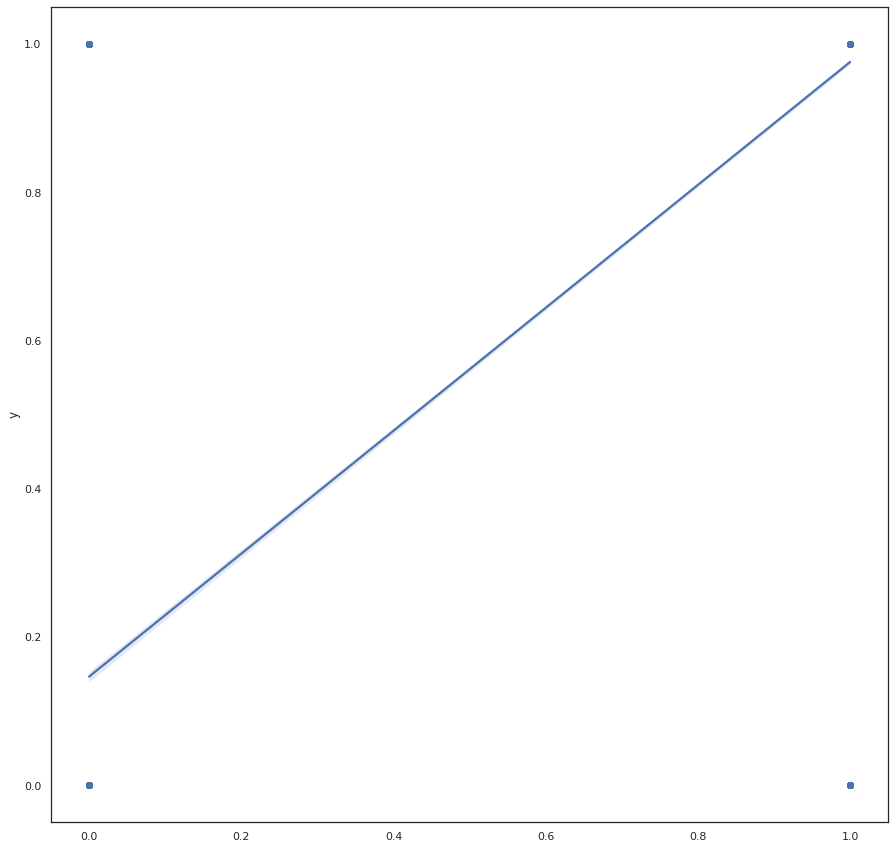

In [ ]:
import seaborn as sns
sns.regplot(y_pred,y_test,data=data_final)

### Confusion Matrix

[[7860  169]
 [1350 6762]]


<AxesSubplot:>

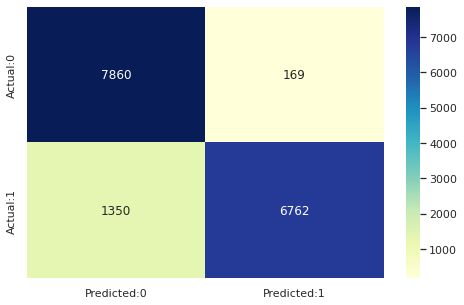

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print("\033[1m The result is telling us that we have: ",(cm[0,0]+cm[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(cm[0,1]+cm[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: " ,(cm.sum()))

 The result is telling us that we have:  14622 correct predictions
 The result is telling us that we have:  1519 incorrect predictions
 We have a total predictions of:  16141


The confusion matrix shows 7860+6762 = 14622 correct predictions and 169+1350= 1519 incorrect ones.

True Positives: 7860 ==> the model predicted that the loan applicant will not defaulted on his loan and it was right.

True Negatives: 6762 ==> the model predicted that the loan applicant will defaulted on his loan and it was right.

False Positives: 169 (Type I error) ==> the model predicted that the loan applicant will not defaulted on his loan and it was wrong.

False Negatives: 1350 ( Type II error) ==> the model predicted that the loan applicant will defaulted on his loan and it was wrong

In [70]:
#Importing the classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      8029
           1       0.98      0.83      0.90      8112

    accuracy                           0.91     16141
   macro avg       0.91      0.91      0.91     16141
weighted avg       0.91      0.91      0.91     16141



### Interpretations:

* The precision of class 1 in the test set, that is the positive predicted value of our model, tells us out of all the “bad” loan applicants which our model has identified how many were actually “bad” loan applicants. So, 98% of the “bad” loan applicants which our model managed to identify were actually “bad” loan applicants.
* The recall of class 1 in the test set, that is the sensitivity of our model, tells us how many “bad” loan applicants our model has managed to identify out of all the “bad” loan applicants existing in our test set. So, our model managed to identify 83% “bad” loan applicants out of all the “bad” loan applicants existing in the test set.

# ROC Curve
The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

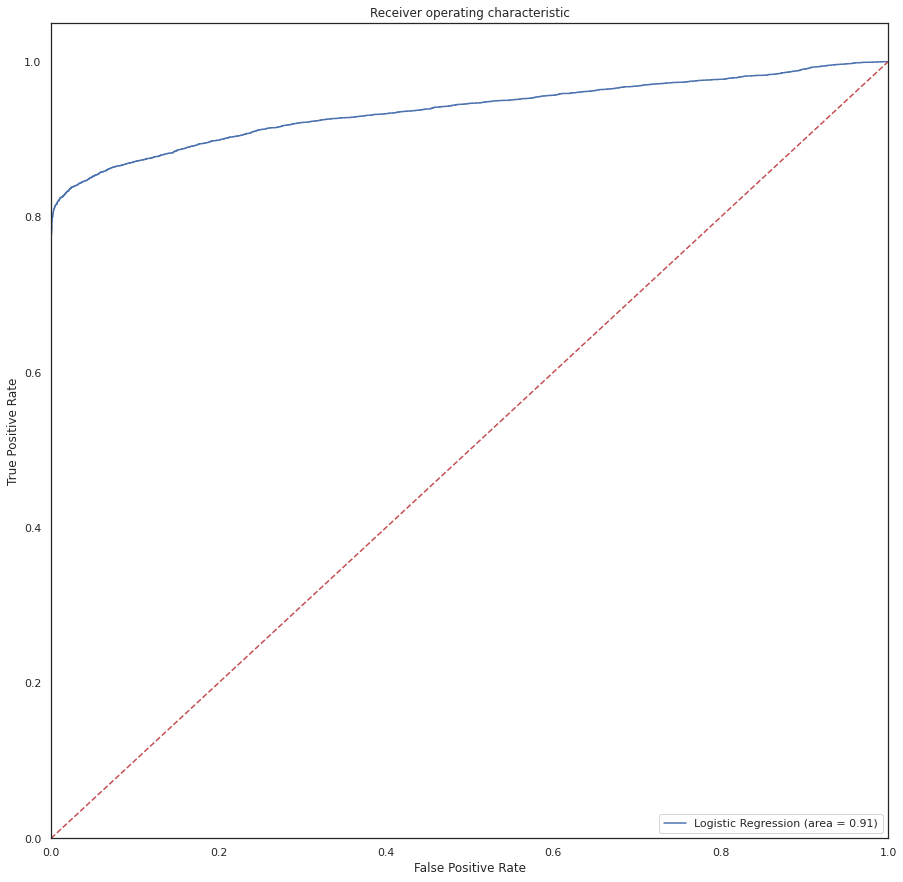

In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [83]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])

0.9380094328915668

# Deployment
Finally, the best way to use the model we have built is to assign a probability to default to each of the loan applicant. 

In [84]:
data['PD'] = logreg.predict_proba(data[X_train.columns])[:,1]
data[['loan_applicant_id', 'PD']].head(10)

,loan_applicant_id,PD
0,191,0.206328
1,34318,0.041881
2,14932,0.201292
3,2776,0.749639
4,11915,0.239430
5,21925,0.439801
6,15110,0.034946
7,19944,0.061453
8,22850,0.422677
9,37927,0.008191


So, our Logistic Regression model is a pretty good model for predicting the probability of default with 91% accuracy.